## Code and idea by Mizgan (@Mizgans)

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming your data is in a CSV file named 'football_data.csv'
df = pd.read_csv('top 5 eu + por leagues ppg prediction data 23_24 - Sheet1.csv')

In [7]:
df.head() #data from top 5 EU and portuguese league for 23/24 Season until March intl break

,Possession % Average,Goals per 90,xG Created per 90,Shots on Target %,Shots per 90,Shots on Target per 90,Goals per Shot,Goals per Shot on Target,Points per Game,Goals conceded per 90,xG Conceded per 90
0,42.2,0.79,1.22,26.8,12.24,3.28,0.06,0.21,1.10,1.14,1.20
1,46.0,0.97,1.25,32.8,12.00,3.93,0.08,0.24,0.45,1.97,1.67
2,61.5,2.39,2.02,32.6,16.79,5.46,0.13,0.39,2.29,0.82,0.69
3,55.2,1.97,1.78,36.5,14.38,5.24,0.13,0.35,1.93,1.34,1.44
4,50.1,1.82,1.47,36.4,13.82,5.04,0.12,0.34,1.68,1.11,1.09


In [6]:
df.drop('Squad', axis=1, inplace=True)

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select columns to scale
cols_to_scale = df.columns.difference(['Points per Game'])

# Apply the scaler
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Check the first few rows of the normalized data
print(df.head())

   Possession % Average  Goals per 90  xG Created per 90  Shots on Target %  \
0              0.221843      0.056522           0.220513           0.055556   
1              0.351536      0.134783           0.235897           0.388889   
2              0.880546      0.752174           0.630769           0.377778   
3              0.665529      0.569565           0.507692           0.594444   
4              0.491468      0.504348           0.348718           0.588889   

   Shots per 90  Shots on Target per 90  Goals per Shot  \
0      0.297930                0.108407        0.083333   
1      0.276328                0.252212        0.250000   
2      0.707471                0.590708        0.666667   
3      0.490549                0.542035        0.666667   
4      0.440144                0.497788        0.583333   

   Goals per Shot on Target  Points per Game  Goals conceded per 90  \
0                  0.185185             1.10               0.333333   
1                  0.296296 

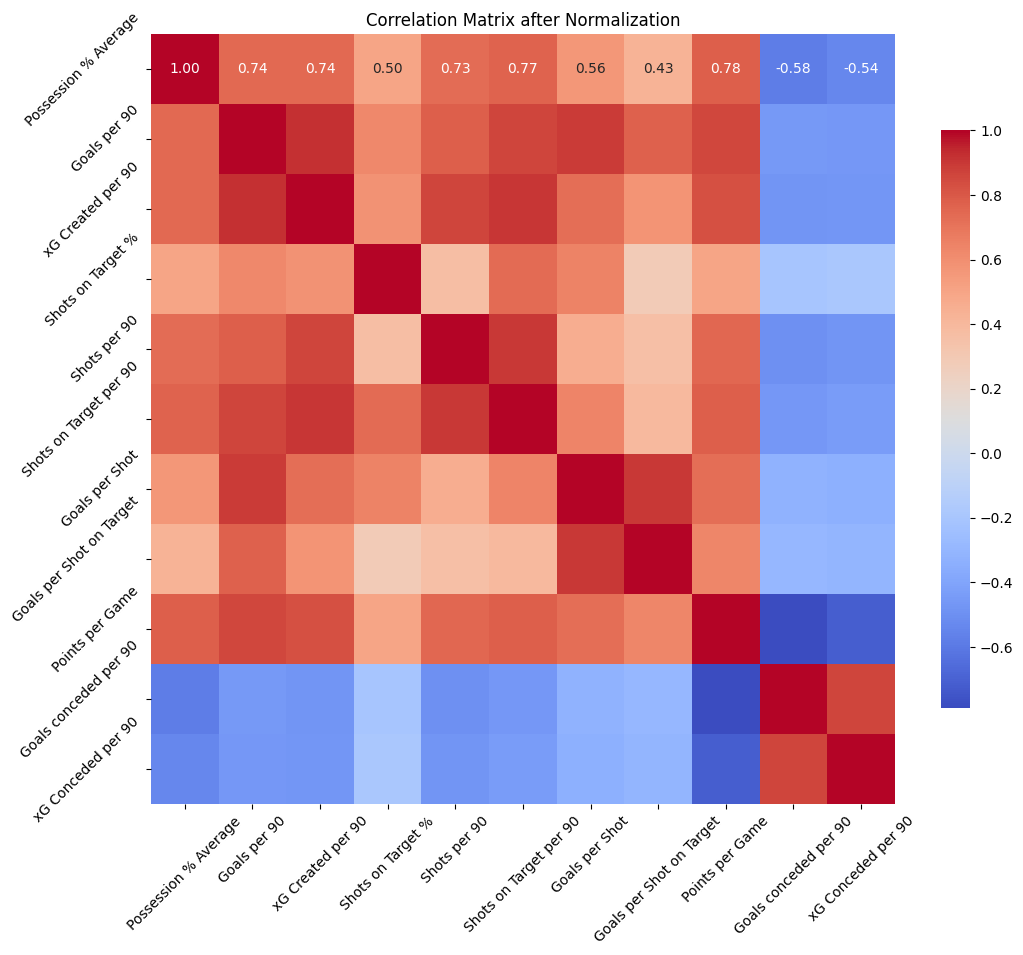

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns,
            cbar_kws={"shrink": .75})

# Add titles and labels for clarity
plt.title('Correlation Matrix after Normalization')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


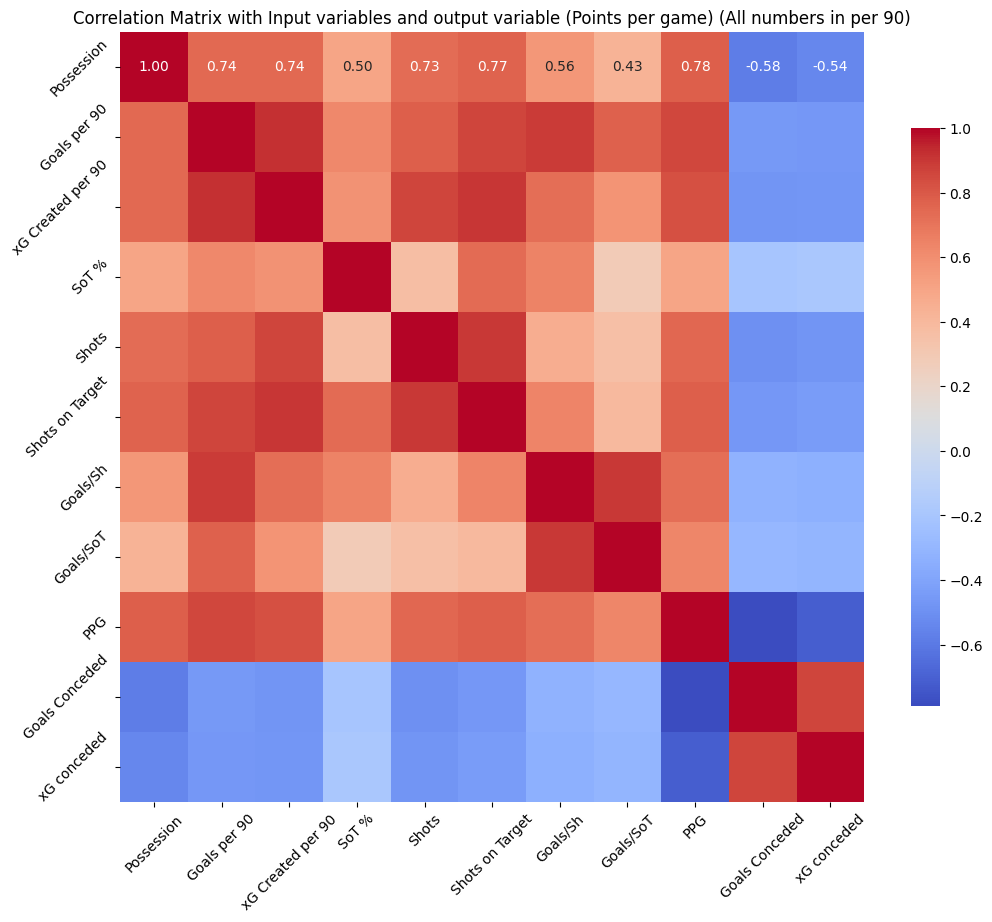

In [13]:
# Rename columns
df_renamed = df.rename(columns={
    'Possession % Average': 'Possession',
    'Shots per 90': 'Shots',
    'Shots on Target %': 'SoT %',
    'Goals conceded per 90': 'Goals Conceded',
    'xG Conceded per 90': 'xG conceded',
    'Goals per Shot on Target': 'Goals/SoT',
    'Goals per Shot': 'Goals/Sh',
    'Shots on Target per 90' : 'Shots on Target',
    'Points per Game': 'PPG'
})

# Now calculate the correlation matrix with the renamed columns
corr_matrix_renamed = df_renamed.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_renamed, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr_matrix_renamed.columns,
            yticklabels=corr_matrix_renamed.columns,
            cbar_kws={"shrink": .75})
plt.title('Correlation Matrix with Input variables and output variable (Points per game) (All numbers in per 90)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


In [15]:
from sklearn.model_selection import train_test_split

# Assuming df_renamed is your dataframe after renaming the columns

X = df_renamed.drop('PPG', axis=1)
y = df_renamed['PPG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Feature ranking:
1. feature Goals per 90 (0.3361473125699205)
2. feature Possession (0.15349583375518436)
3. feature Shots on Target (0.1491945878992933)
4. feature Goals Conceded (0.12868161044025195)
5. feature Shots (0.0809547038871814)
6. feature xG Created per 90 (0.07259974004598307)
7. feature xG conceded (0.04292387104634308)
8. feature Goals/SoT (0.020002521039571126)
9. feature SoT % (0.010375337188475331)
10. feature Goals/Sh (0.005624482127795893)


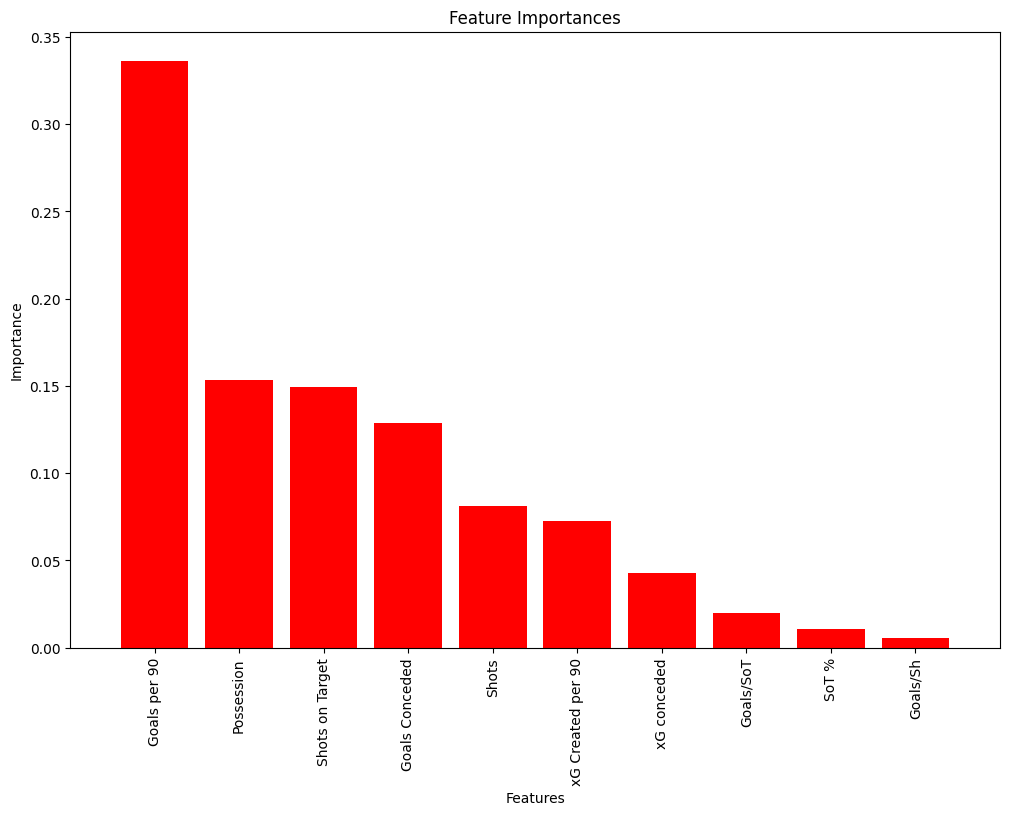

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()
